In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
sns.set_theme()
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
#import scorecardpy as sc
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('bank-additional-full.csv', delimiter= ';')

In [3]:
df2 = pd.read_csv('bank-additional-full.csv', delimiter= ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Encode

In [6]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [7]:
days = ['mon','tue','wed','thu','fri','sat','sun']
df2['day_of_week'] = df['day_of_week'].apply(lambda x: days.index(x))

In [8]:
df2['day_of_week'].value_counts()

3    8623
0    8514
2    8134
1    8090
4    7827
Name: day_of_week, dtype: int64

In [9]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [10]:
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
df2['month'] = df['month'].apply(lambda x: months.index(x)+1)

In [11]:
df2['month'].value_counts()

5     13769
7      7174
8      6178
6      5318
11     4101
4      2632
10      718
9       570
3       546
12      182
Name: month, dtype: int64

In [12]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [13]:
df2['education'] = df['education'].apply(lambda x: 'basic' if x in ['basic.9y', 'basic.4y', 'basic.6y'] else x)

In [14]:
get_dummies = ['job', 'marital', 'education', 'poutcome', 'contact', 'housing']

In [15]:
for col in get_dummies:
    encoded = pd.get_dummies(df2[col], prefix = col)
    df2 = pd.concat([df2, encoded], axis = 1)

In [16]:
df2 = df2.drop(['job', 'marital', 'education', 'poutcome', 'contact', 'housing'], axis = 1)

In [17]:
df2

,age,default,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,...,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone,housing_no,housing_unknown,housing_yes
0,56,no,no,5,0,261,1,999,0,1.1,...,0,0,0,1,0,0,1,1,0,0
1,57,unknown,no,5,0,149,1,999,0,1.1,...,0,0,0,1,0,0,1,1,0,0
2,37,no,no,5,0,226,1,999,0,1.1,...,0,0,0,1,0,0,1,0,0,1
3,40,no,no,5,0,151,1,999,0,1.1,...,0,0,0,1,0,0,1,1,0,0
4,56,no,yes,5,0,307,1,999,0,1.1,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,no,no,11,4,334,1,999,0,-1.1,...,0,0,0,1,0,1,0,0,0,1
41184,46,no,no,11,4,383,1,999,0,-1.1,...,0,0,0,1,0,1,0,1,0,0
41185,56,no,no,11,4,189,2,999,0,-1.1,...,1,0,0,1,0,1,0,0,0,1
41186,44,no,no,11,4,442,1,999,0,-1.1,...,0,0,0,1,0,1,0,1,0,0


In [18]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [19]:
df2['loan'] = df2['loan'].apply(lambda x: 'yes' if x == 'unknown' else x)
df2['loan'] = df2['loan'].apply(lambda x: 1 if x == 'yes' else 0)
df2['loan'].value_counts()

0    33950
1     7238
Name: loan, dtype: int64

In [20]:
df2['y'] = df2['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [21]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [22]:
df2['default'] = df2['default'].apply(lambda x: 'yes' if x == 'unknown' else x)
df2['default'] = df2['default'].apply(lambda x: 1 if x == 'yes' else 0)
df2['default'].value_counts()

0    32588
1     8600
Name: default, dtype: int64

## Modelling

Decision Tree

In [23]:
def decision_tree_before_tuning(X_train, y_train, X_validation):
    dt_model = DecisionTreeClassifier()   
    dt_model.fit(X_train, y_train)
    y_forecast = dt_model.predict(X_test)
    return y_forecast

Random Forest

In [24]:
def random_forest(X_train, y_train, X_test):
    rf_model = RandomForestClassifier(random_state = 0)
    rf_model.fit(X_train, y_train)
    y_forecast = rf_model.predict(X_test)
    return y_forecast

Logistic Regression

In [25]:
def logistic_reg(X_train, y_train, X_test):
    lg_model = LogisticRegression()
    lg_model.fit(X_train, y_train)
    y_forecast = lg_model.predict(X_test)
    return y_forecast

Model Result

In [26]:
def metrics(y_forecast, y_test):
    print('Accurancy:', accuracy_score(y_test, y_forecast))
    print('precision:', precision_score(y_test,y_forecast, average = 'weighted'))
    print('Recall:', recall_score(y_test,y_forecast, average = 'weighted'))
    print('f1:', f1_score(y_test,y_forecast, average = 'weighted'))

Confusion Matrix

In [55]:
def conf_matrix(y_forecast, y_test):
    cf_matrix = confusion_matrix(y_test, y_forecast)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Confusion Matrix ');
    ax.set_xlabel('\nActual Values')
    ax.set_ylabel('Predicted Values ');
    ## Display the visualization of the Confusion Matrix.
    plt.show()

50-50

In [56]:
#Split data
X = df2.drop('default', axis = 1).fillna(0)
y = df2['default']
X_train, X_test, y_train, y_test =\
train_test_split(X, y, test_size=0.5, random_state = 99)

Decision Tree
Accurancy: 0.7296785471496552
precision: 0.7316063025930145
Recall: 0.7296785471496552
f1: 0.7306300199866551


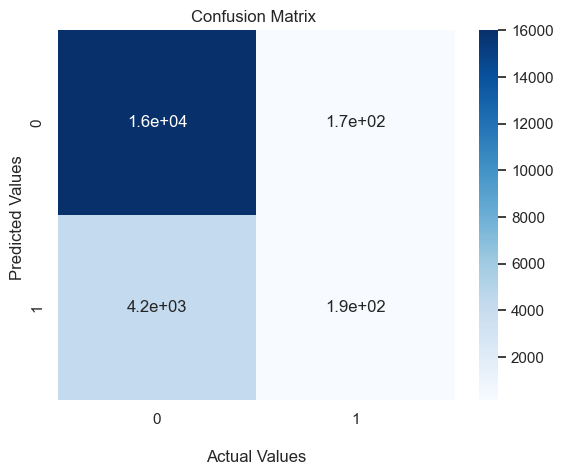

In [57]:
print('Decision Tree')
metrics(decision_tree_before_tuning(X_train, y_train, X_test), y_test)
conf_matrix(logistic_reg(X_train, y_train, X_test), y_test)

Result of Random Forest 
Accurancy: 0.7932893075653102
precision: 0.7590122677828334
Recall: 0.7932893075653102
f1: 0.757991414877248


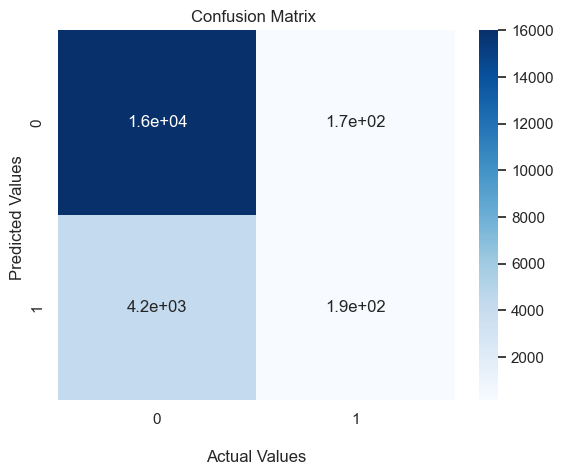

In [58]:
print('Result of Random Forest ')
metrics(random_forest(X_train, y_train, X_test), y_test)
conf_matrix(logistic_reg(X_train, y_train, X_test), y_test)

Result of Logistic Regression 
Accurancy: 0.7862969797028261
precision: 0.7352025359421309
Recall: 0.7862969797028261
f1: 0.7074939773578736


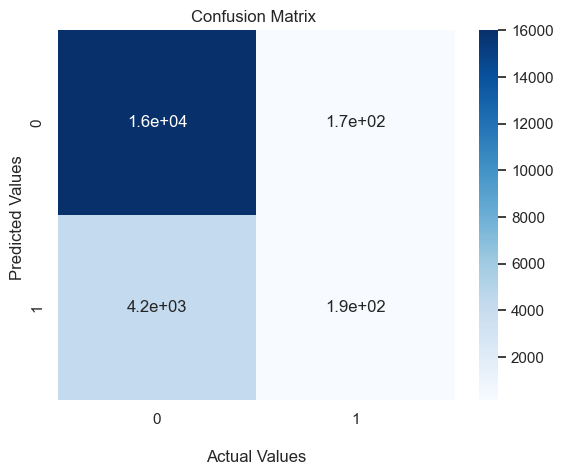

In [59]:
print('Result of Logistic Regression ')
metrics(logistic_reg(X_train, y_train, X_test), y_test)
conf_matrix(logistic_reg(X_train, y_train, X_test), y_test)

80-20

In [60]:
#Split data
X = df2.drop('default', axis = 1).fillna(0)
y = df2['default']
X_train, X_test, y_train, y_test =\
train_test_split(X, y, test_size=0.2, random_state = 99)

Decision Tree
Accurancy: 0.732580723476572
precision: 0.7351036293129984
Recall: 0.732580723476572
f1: 0.7338191444567598


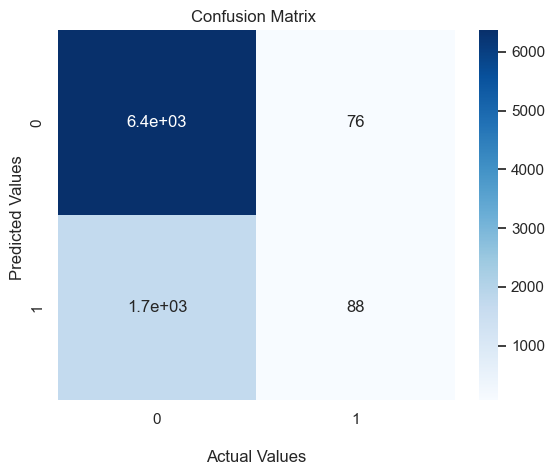

In [61]:
print('Decision Tree')
metrics(decision_tree_before_tuning(X_train, y_train, X_test), y_test)
conf_matrix(logistic_reg(X_train, y_train, X_test), y_test)

Result of Random Forest 
Accurancy: 0.7938820101966497
precision: 0.7627990492121887
Recall: 0.7938820101966497
f1: 0.7620887660624343


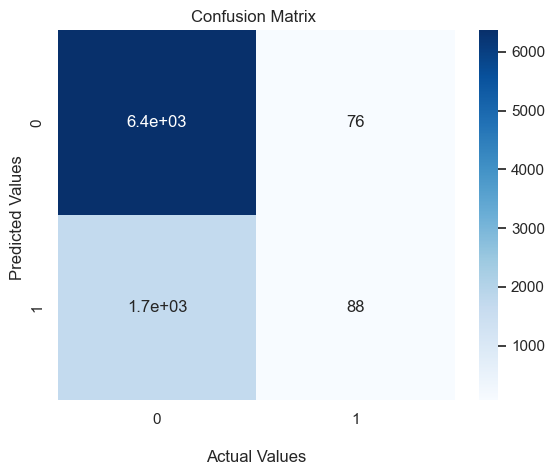

In [62]:
print('Result of Random Forest ')
metrics(random_forest(X_train, y_train, X_test), y_test)
conf_matrix(logistic_reg(X_train, y_train, X_test), y_test)

Result of Logistic Regression 
Accurancy: 0.7835639718378247
precision: 0.733672702781573
Recall: 0.7835639718378247
f1: 0.7056235616955898


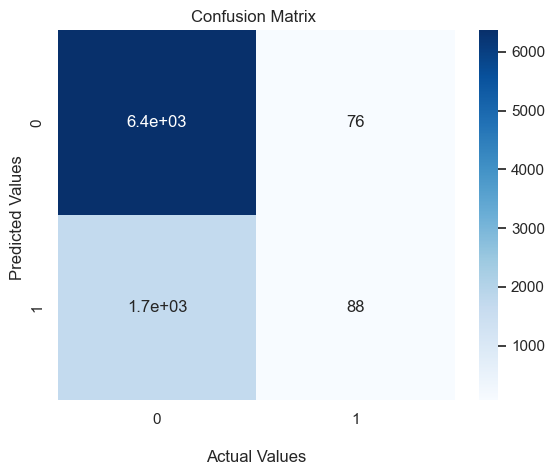

In [63]:
print('Result of Logistic Regression ')
metrics(logistic_reg(X_train, y_train, X_test), y_test)
conf_matrix(logistic_reg(X_train, y_train, X_test), y_test)